In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

In [2]:
# datafile
data=pd.read_csv('matrix1formodel.csv',index_col=0)

In [3]:
# splitting data into training and testing sets
X_train,X_test,y_train,y_test=model_selection.train_test_split(data.iloc[:,:-1],data.loc[:,'anomaly_label'],test_size=0.15,random_state=586)

In [4]:
#confirming that volume of anomalies is approximately balanced
print('Train percent anamolies:',str(np.round(y_train.mean(),4)))
print('Test percent anamolies:',str(np.round(y_test.mean(),4)))

Train percent anamolies: 0.0294
Test percent anamolies: 0.0285


In [5]:
# Create random forest model with default params
random_forest=RandomForestClassifier()

In [6]:
# Fit the model on the training data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
#Use the model to predict on test data
results = random_forest.predict(X_test)

In [8]:
# looking at results object, create confusion matrix to see how well model predicted on testing data
print(confusion_matrix(y_test, results))

[[83797     8]
 [    6  2449]]


In [10]:
# Classification report to see some of the other key metrics of model performance
print(classification_report(y_test,results))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     83805
           1       1.00      1.00      1.00      2455

    accuracy                           1.00     86260
   macro avg       1.00      1.00      1.00     86260
weighted avg       1.00      1.00      1.00     86260



In [11]:
# Running cross validation on the model on the test data 
rfc_cv_score_test = cross_val_score(random_forest, X_test, y_test, cv=10, scoring='roc_auc')
rfc_cv_score_test

array([1.        , 0.99993742, 0.9979587 , 1.        , 0.99993791,
       0.99998448, 1.        , 1.        , 0.99999854, 0.99993645])

In [12]:
# Running cross validation on the training data as well, for interest sake
rfc_cv_score = cross_val_score(random_forest, X_train, y_train, cv=10, scoring='roc_auc')
print(rfc_cv_score)

[0.99999918 0.99999965 0.99999955 0.99999913 0.99999876 0.99999912
 0.99997776 0.99999969 0.99999894 0.99999982]


In [14]:
#Create figure showing feature importance as determined by the model 
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    #print(fi_df)

    #Sort the DataFrame in order decreasing feature importance
    fi_df=fi_df.sort_values(by=['feature_importance'], ascending=False)
    fi_df=fi_df[0:15]

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Seaborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')


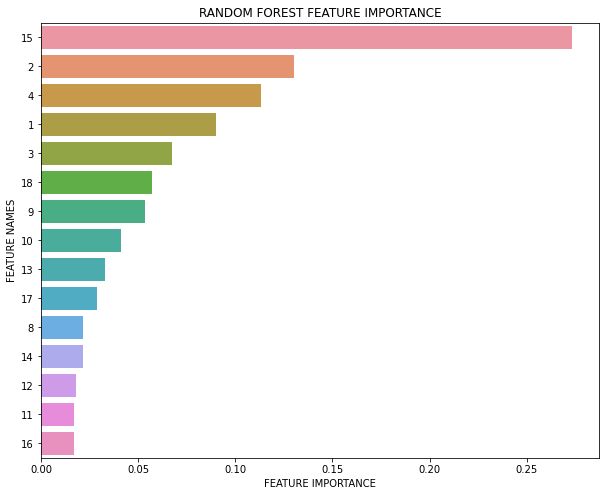

In [15]:
plot_feature_importance(random_forest.feature_importances_,random_forest.feature_names_in_,"RANDOM FOREST ")